In [1]:
import warnings
warnings.filterwarnings("ignore")

### Read the data 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy as sc 
from matplotlib import pyplot as plt 
plt.style.use('ggplot')

In [3]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
# print the shape of the variable values
X.shape

(48842, 14)

In [6]:
#print first five elements of the vriables
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
# Check for columns and its data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [8]:
# print the shape of the y values
y.shape

(48842, 1)

In [9]:
# print first five values of yabs
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [11]:
data = X.join(y)

In [12]:
data.shape

(48842, 15)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [16]:
# Checking for classes with null values
data.isnull().sum()  # work class, occupation and native country has null values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [17]:
# Check for number of unique columns in each class
data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [18]:
# descibe how data is distributed for integer data types
data.describe().T

# Things can be identified - Most of the ages are between late20's to 40's
# Capital gain and capital loss consists with mainly 0's 
# Working hours per week is mostly close to 40 hours

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## Check values in work class

In [19]:
# Unique values of the workClass
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [20]:
# Check the workclass values of ? (1836 points  ?)
filter = data["workclass"] == "?"
data.loc[filter].shape

(1836, 15)

In [21]:
data[(data["workclass"].isnull() == True)].shape

(963, 15)

In [22]:
data[data["workclass"].isnull() == True].sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
35321,23,NaN,164732,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,10,United-States,<=50K.
41274,62,NaN,189098,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,15,United-States,<=50K.
42124,59,NaN,102058,1st-4th,2,Married-civ-spouse,NaN,Husband,White,Male,0,0,45,Portugal,<=50K.
48422,39,NaN,238721,Bachelors,13,Divorced,NaN,Own-child,Black,Female,0,0,40,United-States,<=50K.
38296,22,NaN,201959,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K.


In [23]:
data[data["workclass"] == "?"].sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3402,66,?,190324,HS-grad,9,Married-civ-spouse,?,Husband,Black,Male,0,0,18,United-States,<=50K
14535,20,?,200967,Some-college,10,Never-married,?,Own-child,White,Female,0,0,12,United-States,<=50K
11228,30,?,97281,Some-college,10,Separated,?,Not-in-family,White,Male,0,0,60,United-States,<=50K
23109,17,?,215743,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
7164,20,?,201766,Some-college,10,Never-married,?,Own-child,White,Female,0,0,35,United-States,<=50K


In [24]:
data["workclass"].replace({"?": np.nan}, inplace=True)

In [25]:
data["workclass"].isnull().sum()

2799

In [26]:
data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

<BarContainer object of 8 artists>

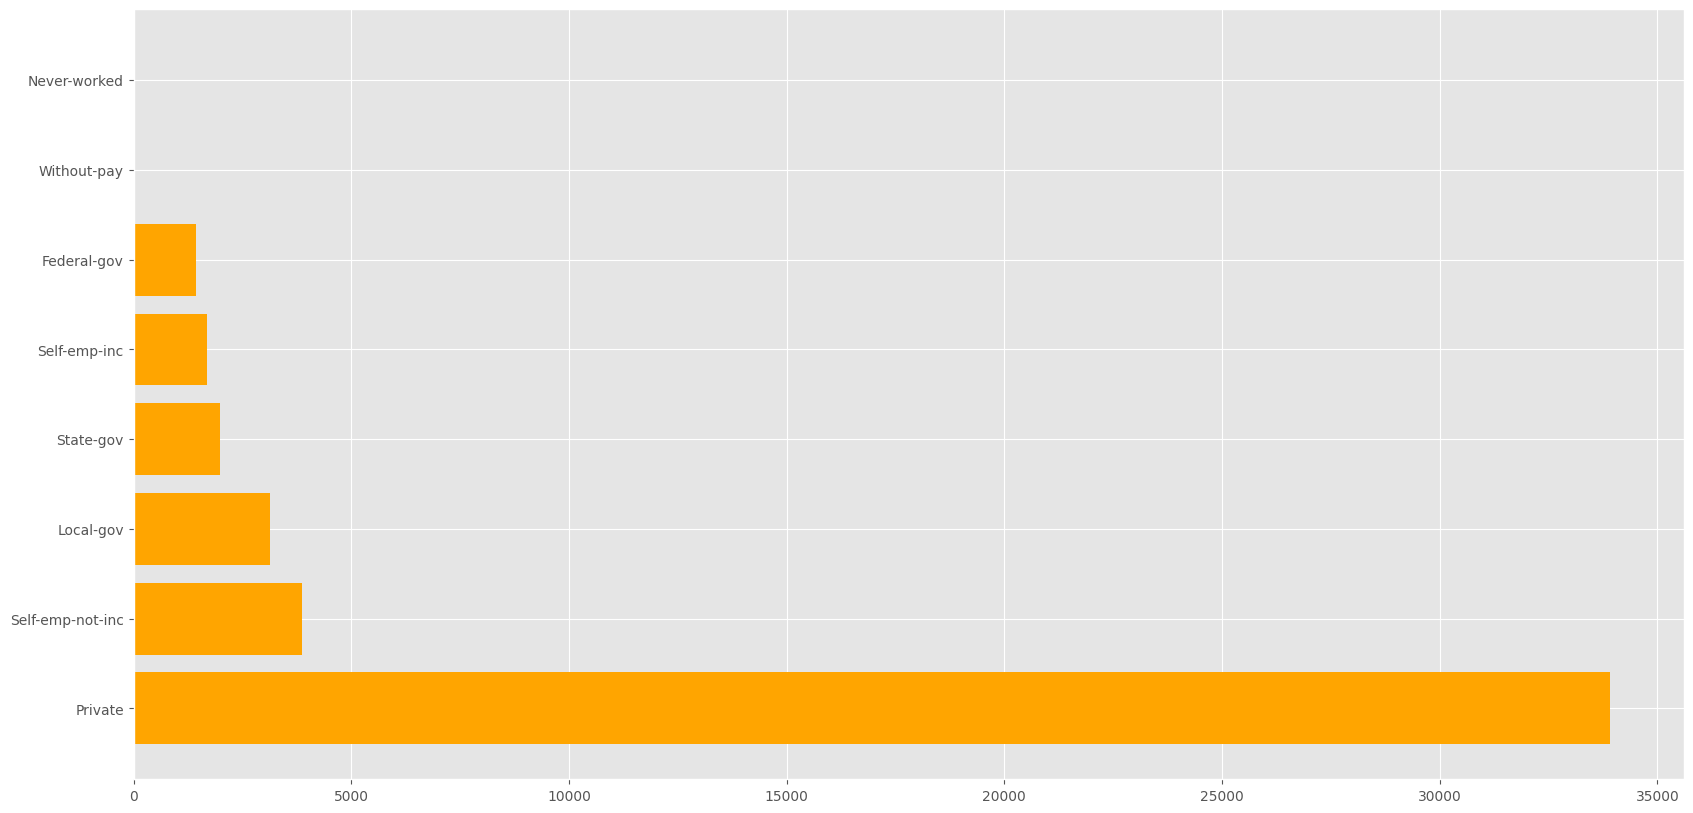

In [27]:
plt.figure(figsize=(20, 10))
plt.barh(data["workclass"].value_counts().index, data["workclass"].value_counts().values, color="orange") 

In [28]:
# Filled the null values of the workclass column with mode, 
# since Private has a huge frequency
data["workclass"].fillna(data["workclass"].mode().iloc[0], inplace=True)

In [29]:
# Unique valus after replacement
data["workclass"].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

## Check values in occupation

In [30]:
data[data["occupation"].isnull() == True].shape[0]

966

In [31]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [32]:
# Replacing ? values with nan
data["occupation"].replace("?", np.nan, inplace=True)

In [33]:
# Null values of occupation after replacement
data[data["occupation"].isnull() == True].shape[0]

2809

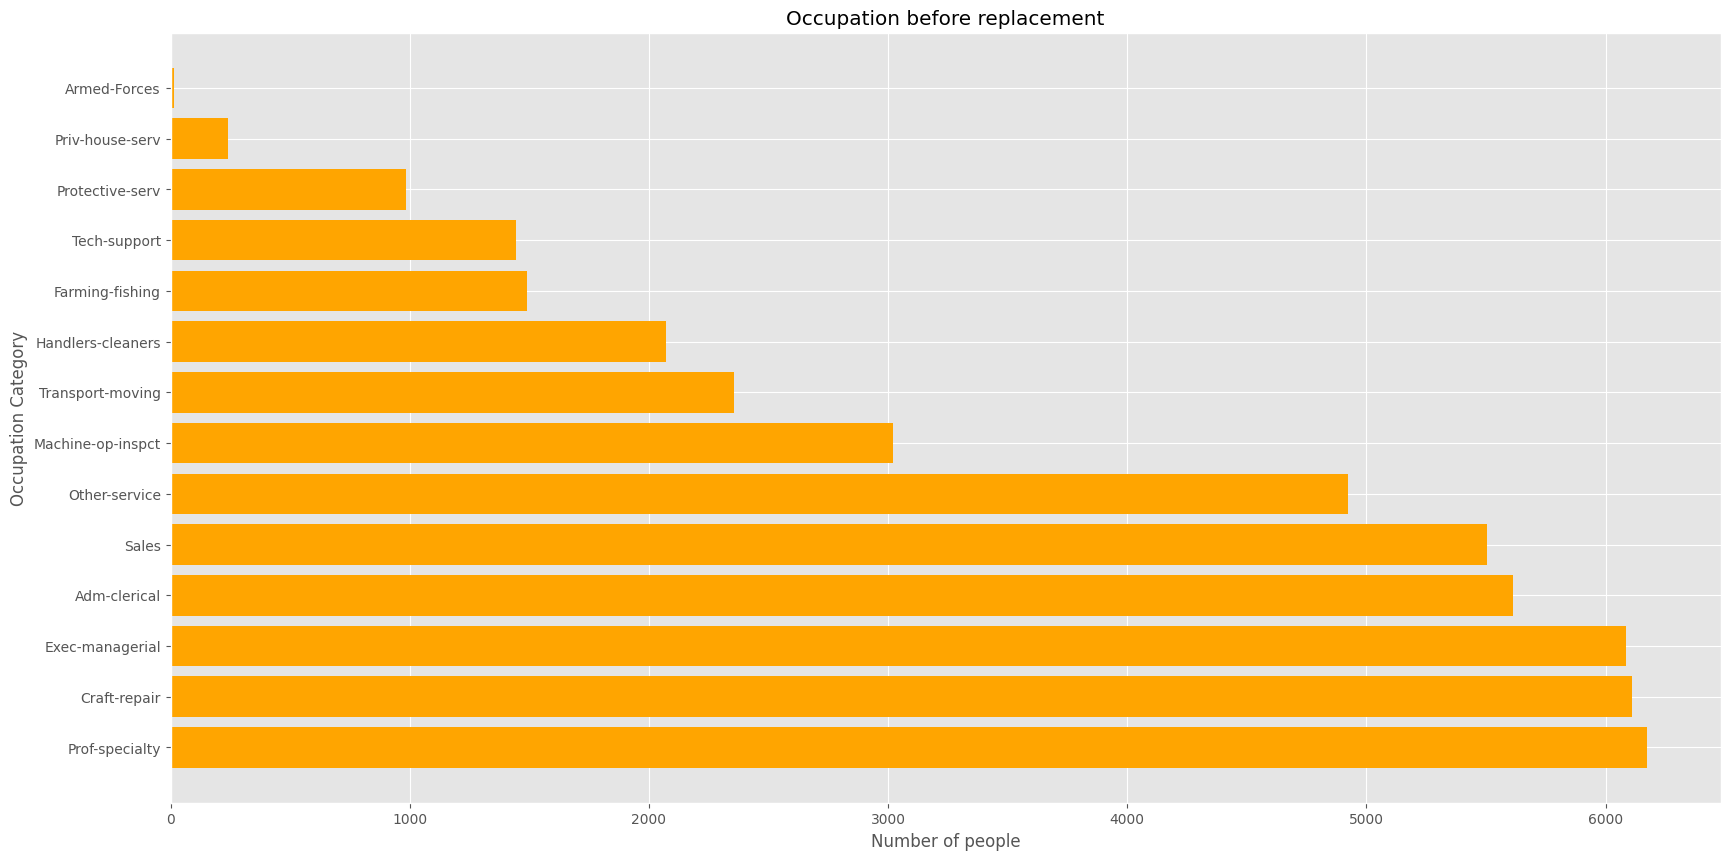

In [34]:
plt.figure(figsize=(20, 10))
plt.title("Occupation before replacement")
plt.ylabel("Occupation Category")
plt.xlabel("Number of people")
keys = data["occupation"].value_counts().index
values = data["occupation"].value_counts().values
plt.barh(keys, values, color="orange")
plt.show()

In [35]:
import random
import numpy as np

random.seed(42)
occupation_categories = ["Prof-specialty", "Craft-repair", "Exec-managerial"]
data["occupation"] = data["occupation"].apply(lambda x: random.choice(occupation_categories) if pd.isnull(x) else x)

In [36]:
data["occupation"].value_counts()

occupation
Craft-repair         7071
Prof-specialty       7064
Exec-managerial      7044
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

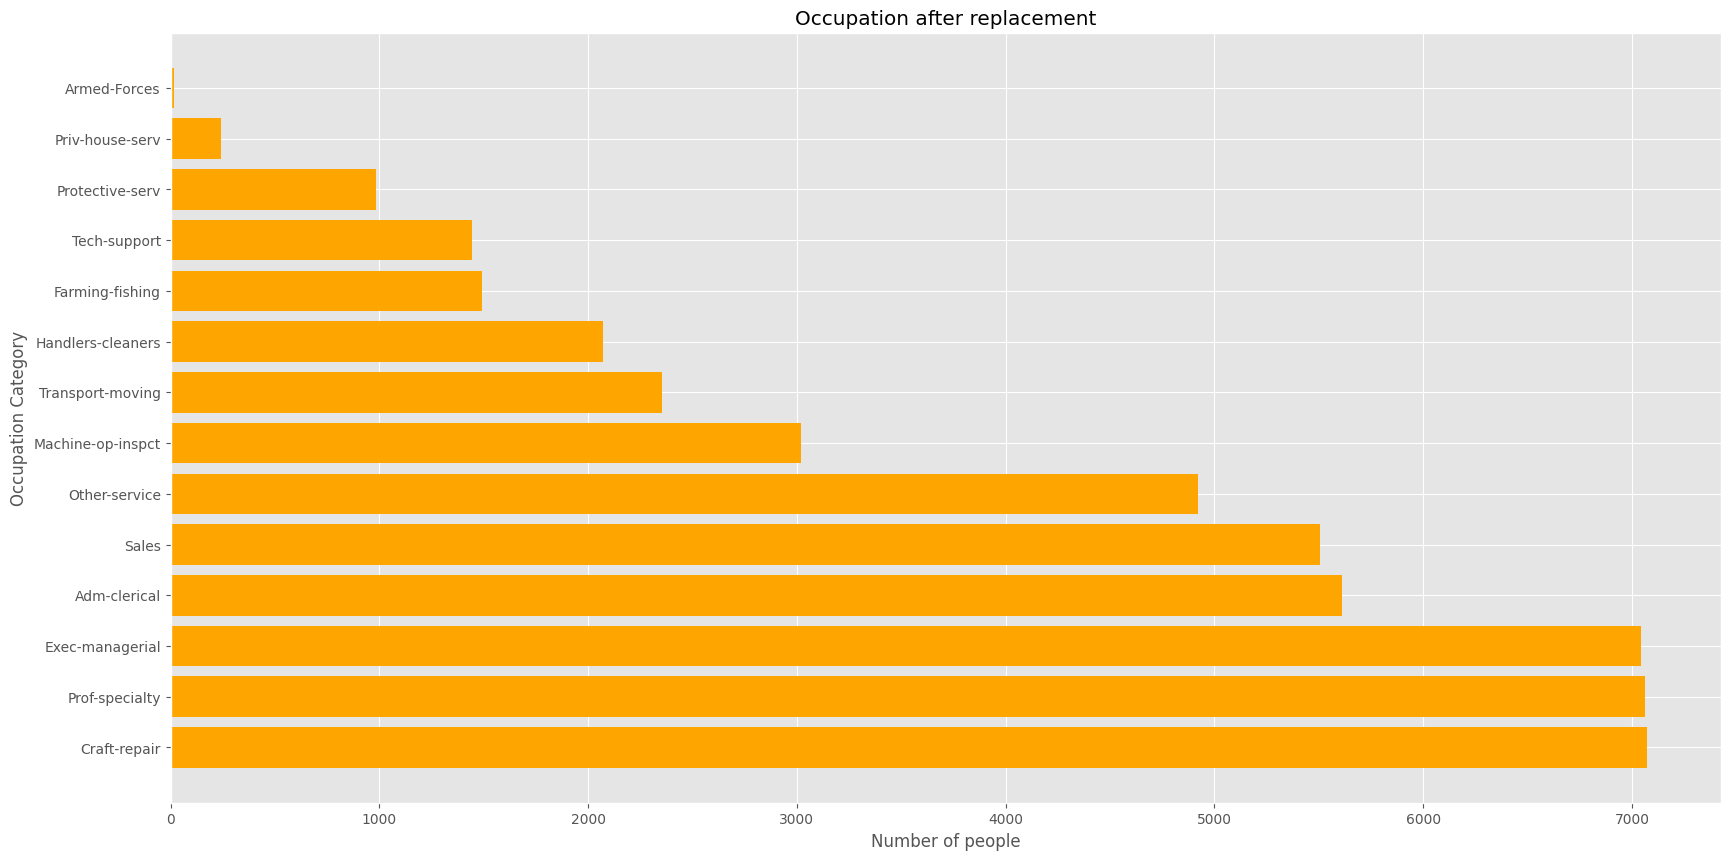

In [37]:
plt.figure(figsize=(20, 10))
plt.title("Occupation after replacement")
plt.ylabel("Occupation Category")
plt.xlabel("Number of people")
keys = data["occupation"].value_counts().index
values = data["occupation"].value_counts().values
plt.barh(keys, values, color="orange")
plt.show()

## Check values in relationship

In [38]:
# Check for unique values in relationship
data["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [39]:
data["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

## Check values in Native Country

In [40]:
data[data["native-country"].isnull() == True].shape

(274, 15)

In [41]:
data[data["native-country"] == "?"].shape

(583, 15)

In [42]:
data["native-country"].replace("?", np.nan, inplace=True)

In [43]:
# get the value count for native countries
data["native-country"].value_counts()
# Most of the values are from us, 
#then can replace the null and ? values with "United-States"

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [44]:
data["native-country"].fillna(data["native-country"].mode().iloc[0], inplace=True)

In [45]:
data["native-country"].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

###  Get a general of the data after handelling null values

In [46]:
data.isnull().sum() # null values solved

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
data.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                4
dtype: int64

## Check values in education

In [48]:
data["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Text(0.5, 0, 'Education Level')

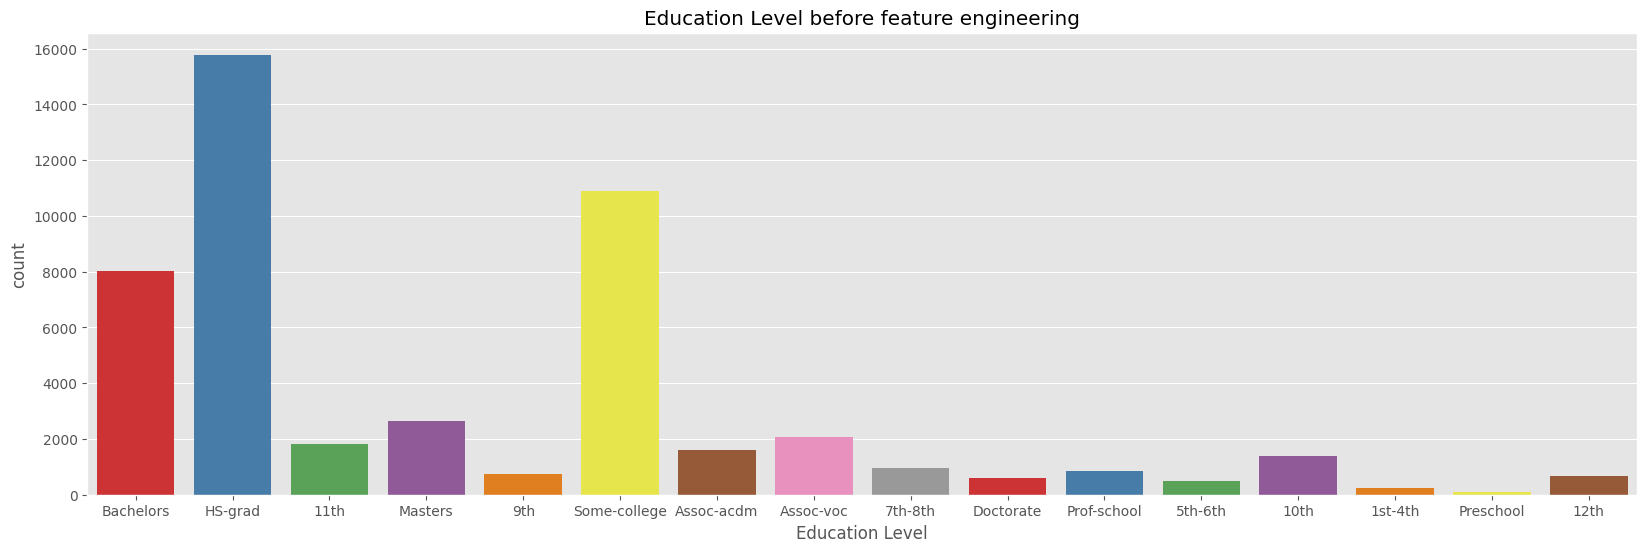

In [49]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['education'], palette='Set1') 
plt.title("Education Level before feature engineering")
plt.xlabel("Education Level")

In [50]:
school_or_below = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th', 'Preschool']
high_school = ['HS-grad']
college = ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school']
under_grad = ['Bachelors']
post_grad = ['Masters']
doctorate = ['Doctorate']

def change_education_values(value):
    if value in school_or_below:
        return "School or below"
    elif value in high_school:
        return "High School"
    elif value in under_grad:
        return "Bachelor degree"
    elif value in post_grad:
        return "Masters Degree"
    elif value in doctorate:
        return "Doctorate"
    elif value in college:
        return "College"
    
    
data["education"] = data["education"].apply(change_education_values) 

In [51]:
data["education"].value_counts()

education
High School        15784
College            15374
Bachelor degree     8025
School or below     6408
Masters Degree      2657
Doctorate            594
Name: count, dtype: int64

Text(0.5, 0, 'Education Level')

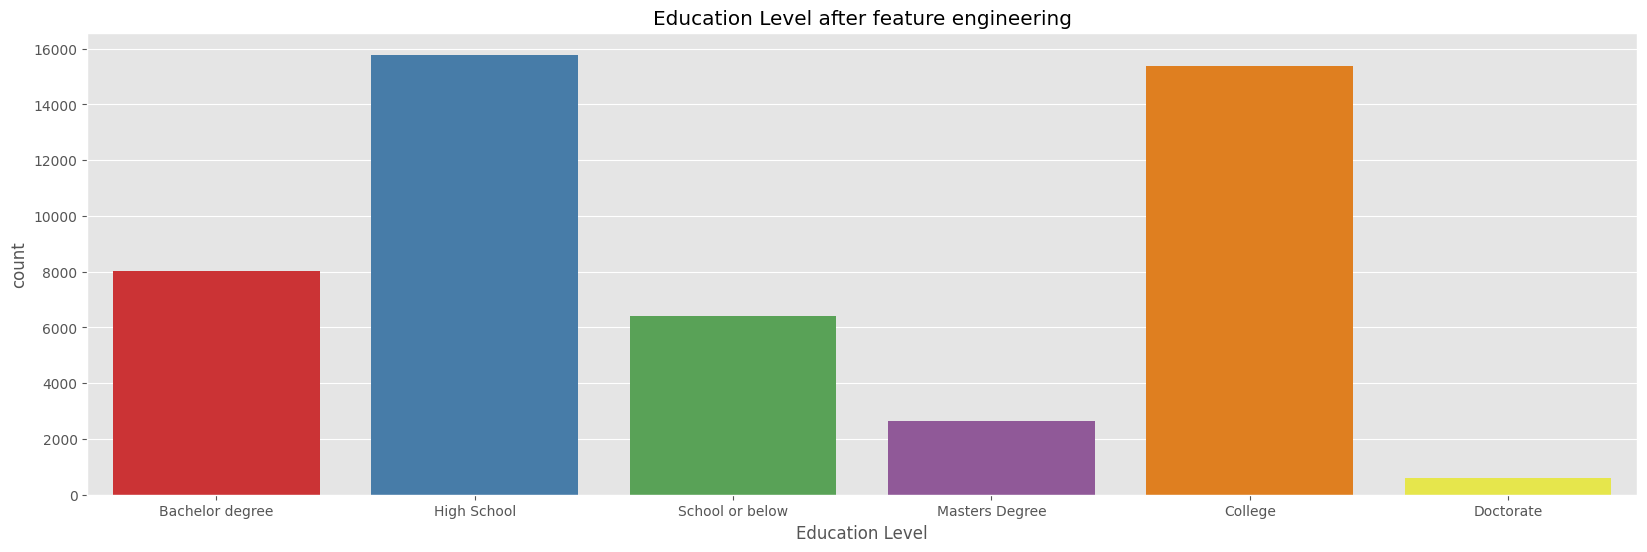

In [52]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['education'], palette='Set1') 
plt.title("Education Level after feature engineering")
plt.xlabel("Education Level")

In [53]:
data["education"].value_counts().values.sum()

48842

## Check values in martial Status

Text(0.5, 0, 'Marital Status')

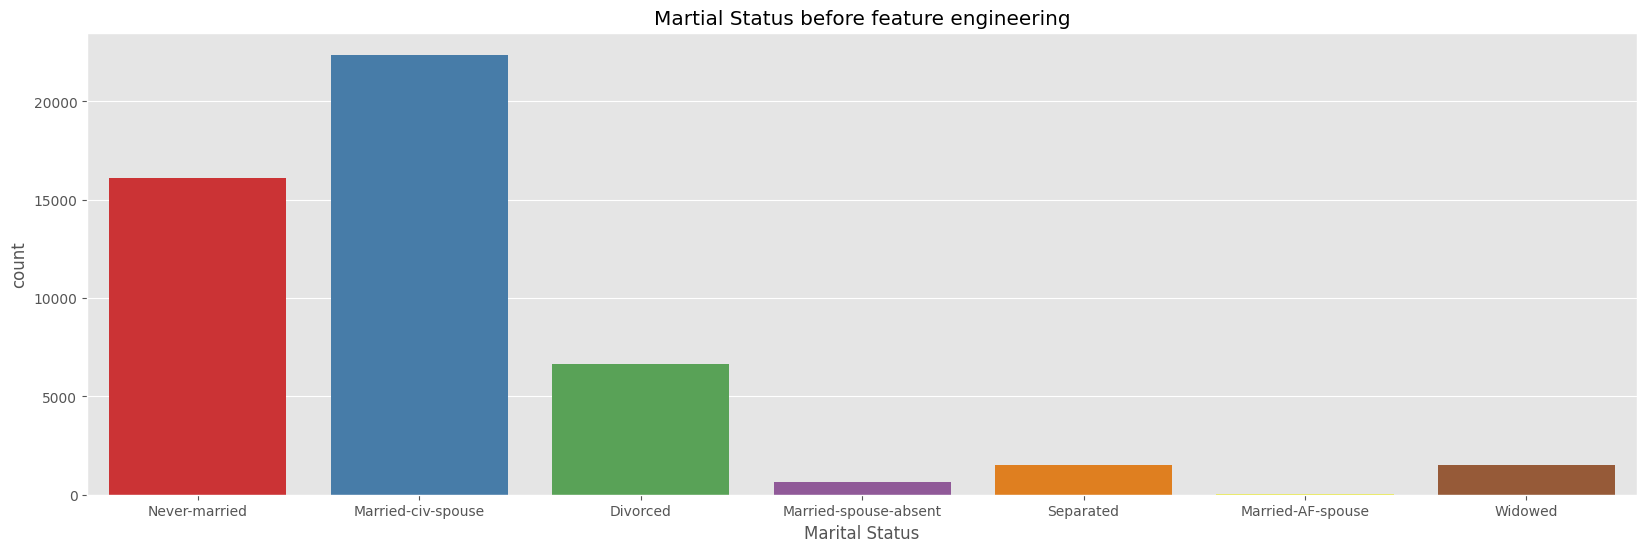

In [54]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['marital-status'], palette='Set1') 
plt.title("Martial Status before feature engineering")
plt.xlabel("Marital Status")

In [55]:
data["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [56]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [57]:
# civ spouce - civillian spouce, af-spouce - from armed forces 
never_married = ['Never-married']
married = ['Married-civ-spouse', 'Married-AF-spouse']
divorced = ['Divorced']
# 'Married-spouse-absent' - (not living together)
other_status = ['Married-spouse-absent', 'Widowed', 'Separated']

def spouce_status_change_values(value):
    if value in never_married:
        return "Never-married"
    elif value in married:
        return "Married"
    elif value in divorced:
        return "Divorced"
    elif value in other_status:
        return "Other"
    
data["marital-status"] = data["marital-status"].apply(spouce_status_change_values)

In [58]:
data["marital-status"].value_counts()

marital-status
Married          22416
Never-married    16117
Divorced          6633
Other             3676
Name: count, dtype: int64

Text(0.5, 0, 'Marital Status')

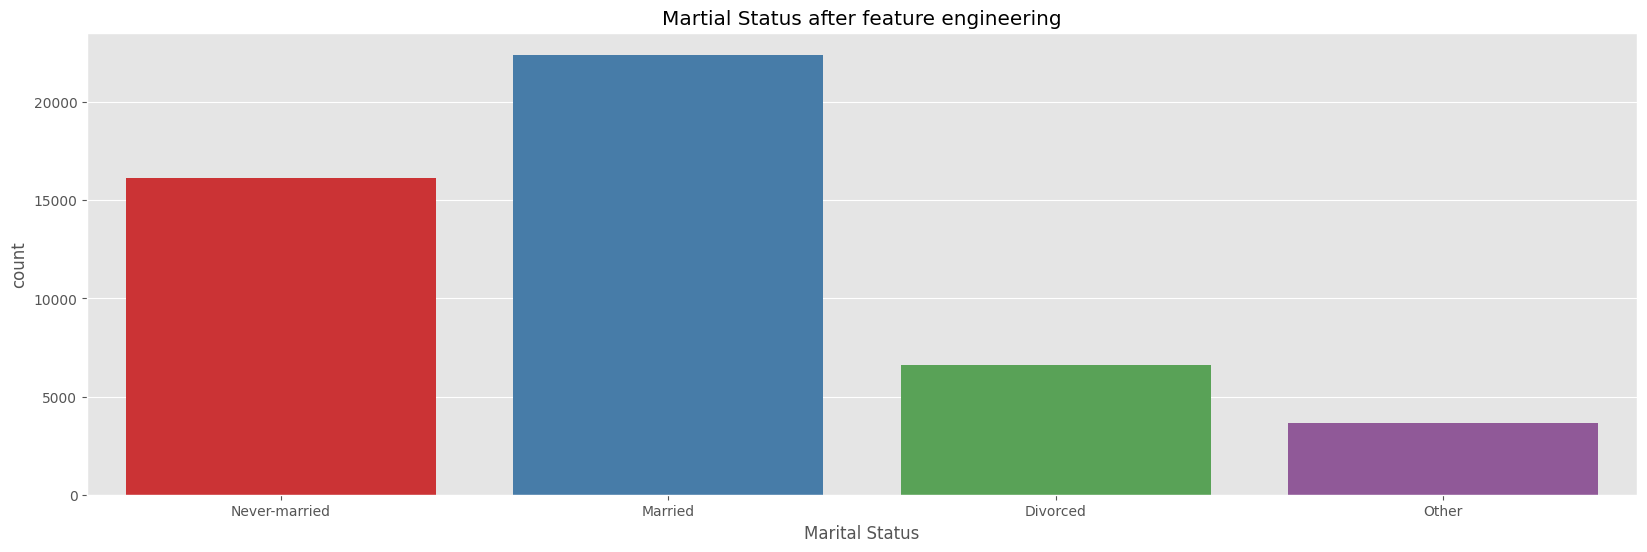

In [59]:
plt.figure(figsize=(20, 6))
sns.countplot(x=data['marital-status'], palette='Set1') 
plt.title("Martial Status after feature engineering")
plt.xlabel("Marital Status")

## Feature Engineering for native country

In [60]:
data["native-country"].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [61]:
data["native-country"] = data["native-country"].apply(lambda x : x if x == "United-States" else "Other")

In [62]:
data["native-country"].value_counts()

native-country
United-States    44689
Other             4153
Name: count, dtype: int64

Text(0.5, 0, 'Native Country')

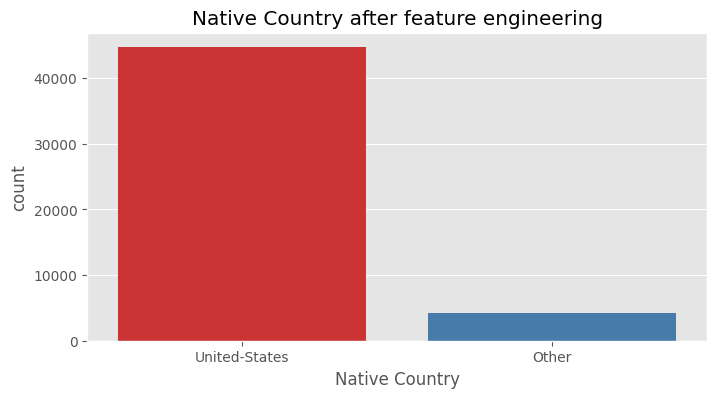

In [63]:
plt.figure(figsize=(8, 4))
sns.countplot(x=data['native-country'], palette='Set1') 
plt.title("Native Country after feature engineering")
plt.xlabel("Native Country")

## Check values in income

In [64]:
data["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [65]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelor degree,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelor degree,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School or below,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelor degree,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K


In [66]:
over_50k = [">50K", ">50K."]
less_equal_50k = ["<=50K", "<=50K."]

def income_classification_change(value):
    if value in over_50k:
        return ">50K"
    elif value in less_equal_50k:
        return "<=50K"
    
data["income"] = data["income"].apply(income_classification_change)

In [67]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

Text(0.5, 0, 'Income class')

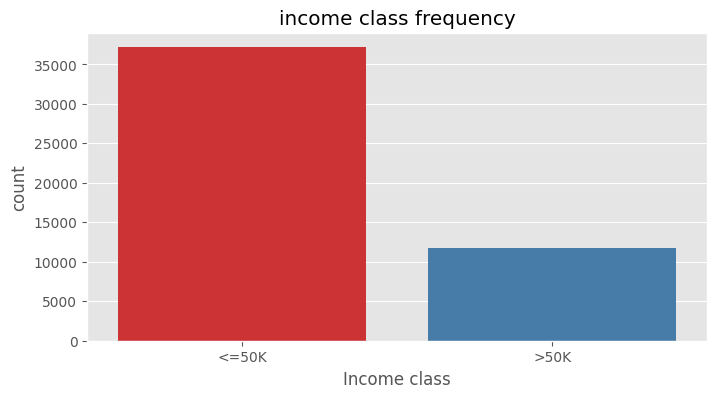

In [68]:
plt.figure(figsize=(8, 4))  # This data set is inbalanced
sns.countplot(x=data['income'], palette='Set1') 
plt.title("income class frequency")
plt.xlabel("Income class")

In [69]:
data["income"].value_counts() # there is an imbalance of the data set

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Work Class Feature Engineering

In [70]:
data["workclass"].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [71]:
def calculate_value_counts(selected_column, data):
    # Get value counts
    value_counts = selected_column.value_counts()
    # Get the maximum count
    max_count = value_counts.max()
    # percentage out 0f whole dataset
    percentage = value_counts / len(data) *100
    # Combine value counts and ratios into a DataFrame
    result_df = pd.DataFrame({'value_counts': value_counts,'percentage':percentage})
    return result_df

In [72]:
# Calculate income with greater than 50k for work classess
high = calculate_value_counts(data[data["income"] == ">50K"]["workclass"], data) 
high 

,value_counts,percentage
workclass,,
Private,7652,15.666844
Self-emp-not-inc,1077,2.205069
Self-emp-inc,938,1.920478
Local-gov,927,1.897957
Federal-gov,561,1.148602
State-gov,530,1.085132
Without-pay,2,0.004095


In [73]:
# Calculate income with less than 50k for work classess
low = calculate_value_counts(data[data["income"] == "<=50K"]["workclass"], data)
low

,value_counts,percentage
workclass,,
Private,29053,59.483641
Self-emp-not-inc,2785,5.702060
Local-gov,2209,4.522747
State-gov,1451,2.970804
Federal-gov,871,1.783301
Self-emp-inc,757,1.549896
Without-pay,19,0.038901
Never-worked,10,0.020474


In [74]:
# This is an abnormality, this cannot be happen
data[data["workclass"] == "Never-worked"]["hours-per-week"]

5361     40
10845    35
14772    30
20337    10
23232    40
32304    40
32314     4
41346    20
44168    35
46459    35
Name: hours-per-week, dtype: int64

In [75]:
# Dropped the never worked values
data = data[data["workclass"] != "Never-worked"]
data[data["workclass"] == "Never-worked"]["hours-per-week"]

Series([], Name: hours-per-week, dtype: int64)

In [76]:
data["workclass"].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: count, dtype: int64

In [77]:
government = ["State-gov", "Local-gov", "Federal-gov"]
private = ["Private"]
self_employee_income = ["Self-emp-inc"]
self_employee_not_income = ["Self-emp-not-inc"]
other = ["Without-pay"]

def change_workclass(value):
    if value in government:
        return "Government"
    elif value in private:
        return "Private"
    elif value in self_employee_income:
        return "Self-emp-inc"
    elif value in self_employee_not_income:
        return "Self-emp-not-inc"
    elif value in other:
        return "Other"

In [78]:
data["workclass"] = data["workclass"].apply(change_workclass)

In [79]:
data["workclass"].value_counts()

workclass
Private             36705
Government           6549
Self-emp-not-inc     3862
Self-emp-inc         1695
Other                  21
Name: count, dtype: int64

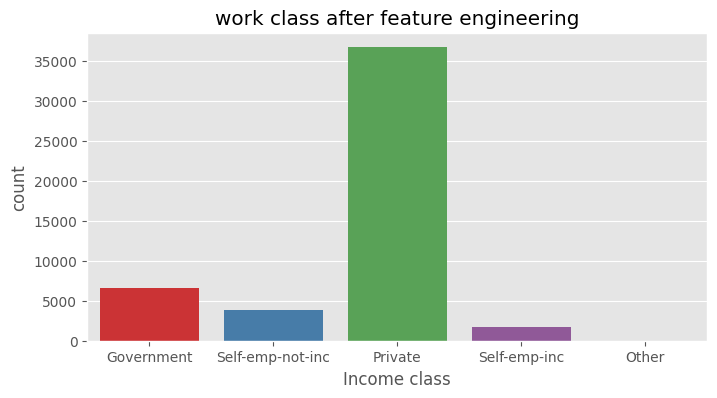

In [80]:
plt.figure(figsize=(8, 4)) 
sns.countplot(x=data['workclass'], palette='Set1') 
plt.title("work class after feature engineering")
plt.xlabel("Income class")
plt.show()

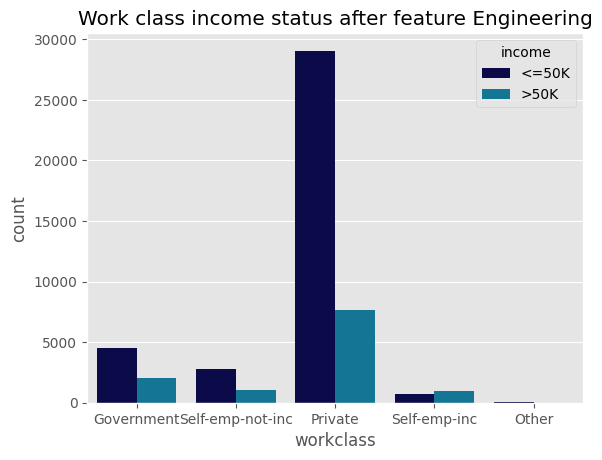

In [81]:
plt.title("Work class income status after feature Engineering")
sns.countplot(x="workclass", hue="income", data=data, palette="ocean") 
plt.show()

### Marital Status Analysis after feature engineering

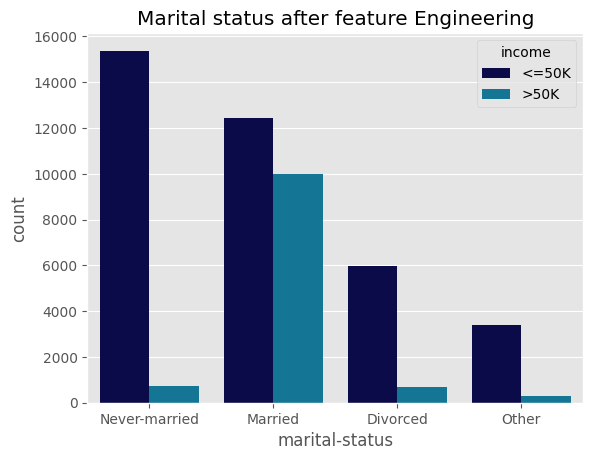

In [82]:
plt.title("Marital status after feature Engineering")
sns.countplot(x="marital-status", hue="income", data=data, palette="ocean") 
plt.show()

### Education status Analysis after feature Engineering

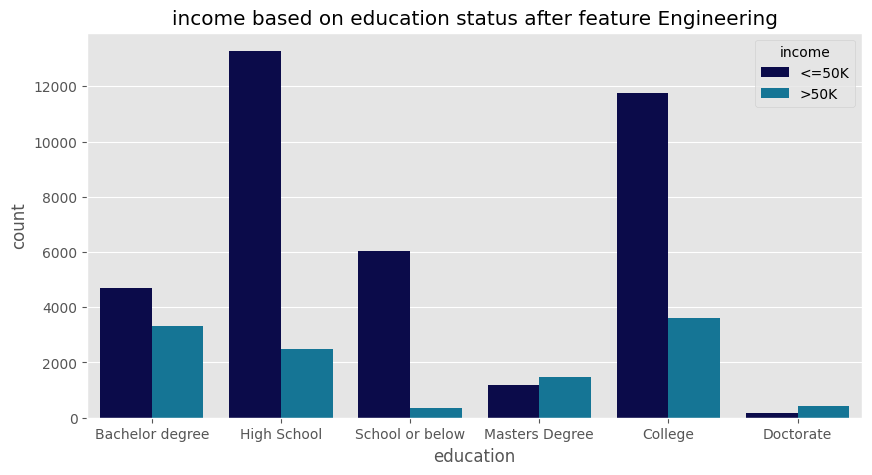

In [83]:
plt.figure(figsize=(10, 5))
plt.title("income based on education status after feature Engineering")
sns.countplot(x="education", hue="income", data=data, palette="ocean") 
plt.show()

## Analyse Dataset  with sex

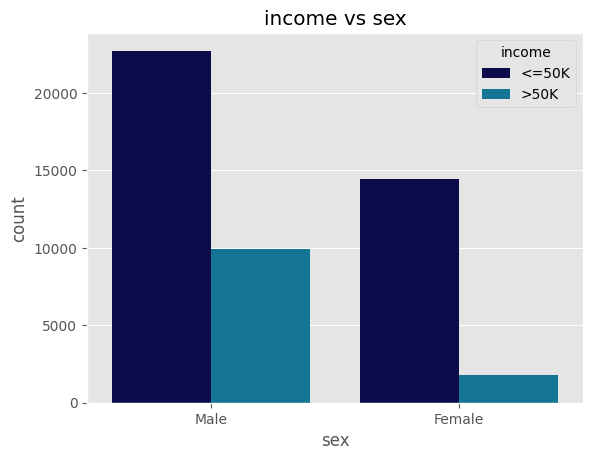

In [84]:
plt.title("income vs sex")
sns.countplot(x="sex", hue="income", data=data, palette="ocean") 
plt.show()

## Analyse dataset with Relationship

<Axes: title={'center': 'Relationship'}, xlabel='relationship', ylabel='count'>

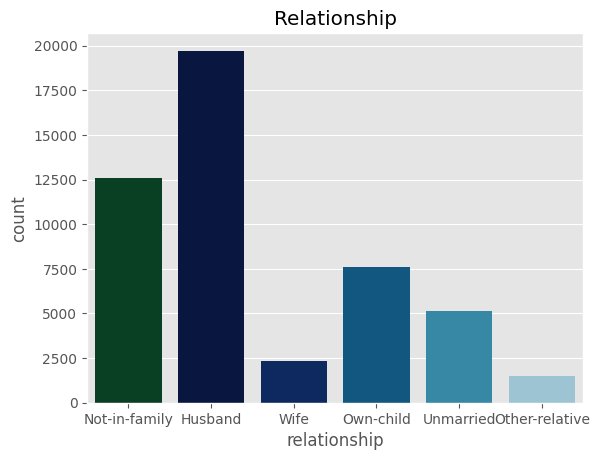

In [85]:
plt.title("Relationship")
sns.countplot(x="relationship", data=data, palette="ocean") 

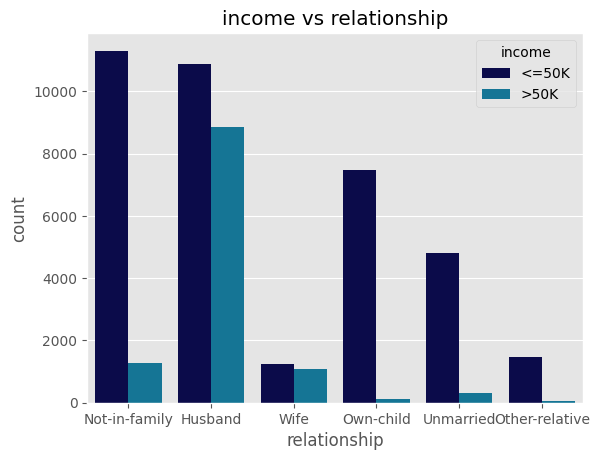

In [86]:
plt.title("income vs relationship")
sns.countplot(x="relationship", hue="income", data=data, palette="ocean") 
plt.show()

## Outlier Detection of numerical values

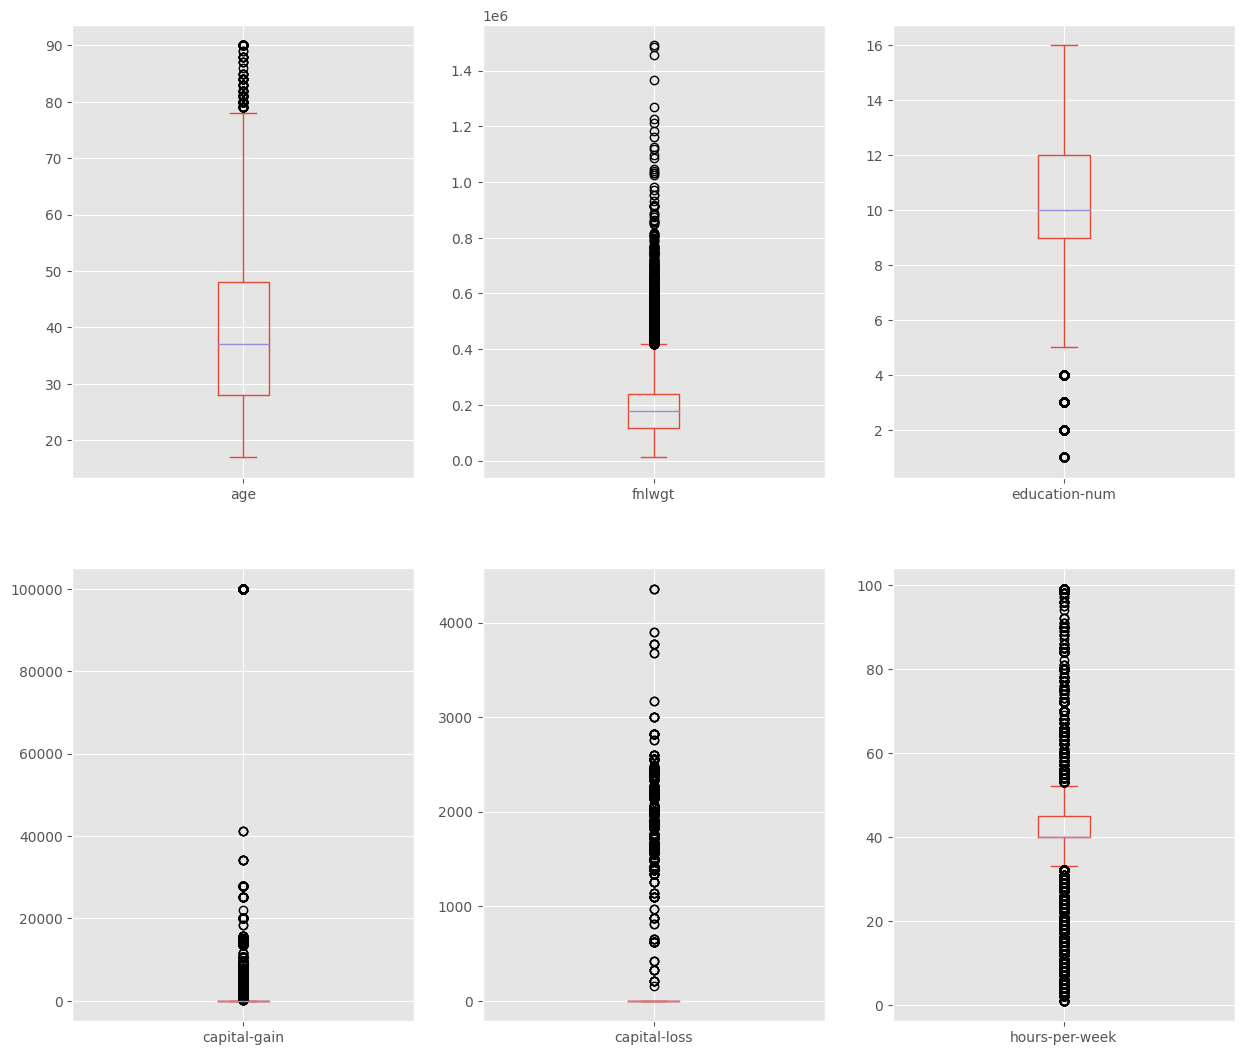

In [87]:
# Check whether data set has outliers
data.plot(kind="box", figsize=(15, 20), layout=(3, 3), subplots=True) 
plt.show()

### Analyse an clean outliers detected

In [88]:
data["hours-per-week"].mean()

40.424741972477065

In [89]:
data["hours-per-week"].describe()

count    48832.000000
mean        40.424742
std         12.390344
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Text(0.5, 1.0, 'Distribution plot for working hours per week')

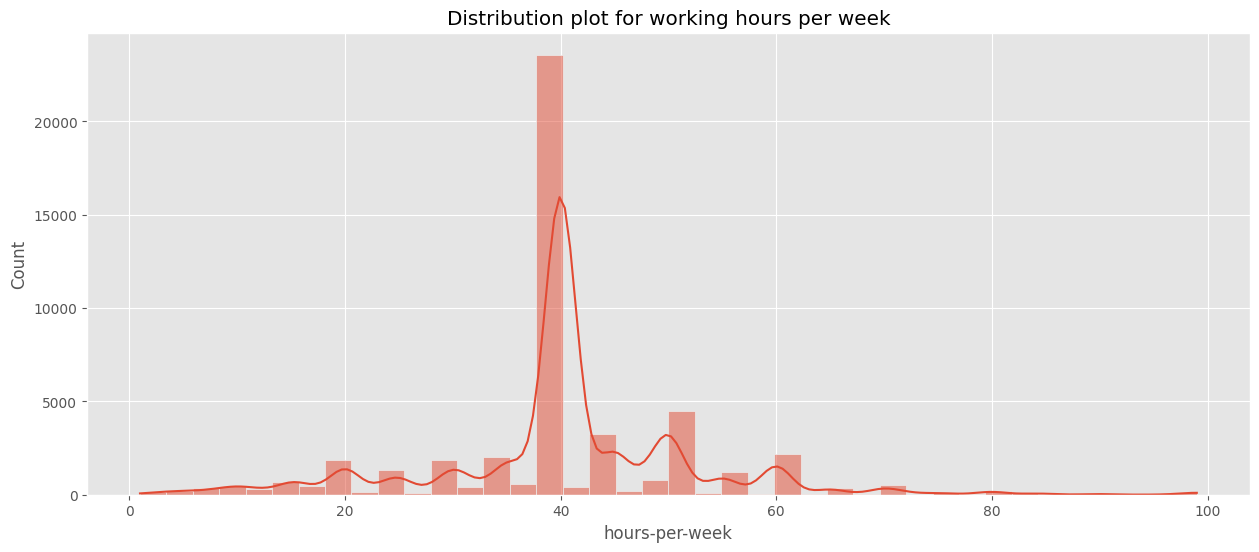

In [90]:
plt.figure(figsize=(15,6))
sns.histplot(data["hours-per-week"], kde=True, bins=40)
plt.title("Distribution plot for working hours per week") 

In [91]:
# people who have over worked after age 60
data[(data["age"] > 65) & (data["hours-per-week"] > 70)].shape

(26, 15)

In [92]:
data = data[~((data["age"] > 65) & (data["hours-per-week"] > 70))] 

In [93]:
# people who work less than 10 hours a week in private and government
data[(data["hours-per-week"]  < 10) & ((data["workclass"].isin(["Government", "Private"])))].shape

(604, 15)

In [94]:
# remove data working hours per week less than 10 and work class in (Government or private)
data = data[~((data["hours-per-week"]  < 10) & ((data["workclass"].isin(["Government", "Private"]))))]

In [95]:
data.shape

(48202, 15)

In [96]:
# Can't remove this, due to USA allows marriage in 17 with certain laws
data[(data["age"] < 18) & (data["marital-status"] != "Never-married")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7644,17,Private,221129,School or below,5,Married,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
18800,17,Private,186890,School or below,6,Married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
41321,17,Private,27251,School or below,7,Other,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
46064,17,Private,364952,School or below,6,Other,Other-service,Other-relative,White,Male,0,0,40,United-States,<=50K


In [97]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Government,77516,Bachelor degree,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelor degree,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School or below,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelor degree,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K


In [98]:
# sns.pairplot(data=data, hue="income")

In [99]:
data.nunique()

age                  74
workclass             5
fnlwgt            28153
education             6
education-num        16
marital-status        4
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country        2
income                2
dtype: int64

In [100]:
data["race"].value_counts()

race
White                 41206
Black                  4637
Asian-Pac-Islander     1494
Amer-Indian-Eskimo      462
Other                   403
Name: count, dtype: int64

### Label Encoding Process

In [101]:
X = data.drop('income', axis=1)
Y = data['income']

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
for column in X.columns:
    if X[column].dtypes == 'object':
        encoder = LabelEncoder()
        X[column] = encoder.fit_transform(X[column])

In [104]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,77516,0,13,2,0,1,4,1,2174,0,40,1
1,50,4,83311,0,13,1,3,0,4,1,0,0,13,1
2,38,2,215646,3,9,0,5,1,4,1,0,0,40,1
3,53,2,234721,5,7,1,5,0,2,1,0,0,40,1
4,28,2,338409,0,13,1,9,5,2,0,0,0,40,0


In [105]:
Y.value_counts()

income
<=50K    36577
>50K     11625
Name: count, dtype: int64

### Feature Extraction

In [106]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,77516,0,13,2,0,1,4,1,2174,0,40,1
1,50,4,83311,0,13,1,3,0,4,1,0,0,13,1
2,38,2,215646,3,9,0,5,1,4,1,0,0,40,1
3,53,2,234721,5,7,1,5,0,2,1,0,0,40,1
4,28,2,338409,0,13,1,9,5,2,0,0,0,40,0


In [107]:
Y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

### Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler

### Imbalance Learning

In [109]:
Y.value_counts()

income
<=50K    36577
>50K     11625
Name: count, dtype: int64

In [110]:
#from imblearn.over_sampling import RandomOverSampler

In [111]:
#random_sampler = RandomOverSampler(random_state=42)

In [112]:
#X_resampled, Y_resampled = random_sampler.fit_resample(X, Y)

In [113]:
#Y_resampled.value_counts()

### Train test Split process

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

### Gaussian Naive Bayes Model

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gausian_model = GaussianNB()
gausian_model.fit(train_x, train_y)

GaussianNB()

In [118]:
gausian_model.score(test_x, test_y)

0.7930986792061406

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
random_model = RandomForestClassifier()

In [121]:
random_model.fit(train_x, train_y)

RandomForestClassifier()

In [122]:
random_model.score(test_x, test_y)

0.8563723117350114

In [123]:
random_model.score(train_x, train_y) 

0.9998518123351412

In [124]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,77516,0,13,2,0,1,4,1,2174,0,40,1
1,50,4,83311,0,13,1,3,0,4,1,0,0,13,1
2,38,2,215646,3,9,0,5,1,4,1,0,0,40,1
3,53,2,234721,5,7,1,5,0,2,1,0,0,40,1
4,28,2,338409,0,13,1,9,5,2,0,0,0,40,0


In [126]:
from sklearn.metrics import accuracy_score 

In [130]:
predicted = random_model.predict(train_x)
score = accuracy_score(train_y, predicted) 

In [131]:
score

0.9998518123351412